In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math

print(tf.__version__)

2.7.0


In [2]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
training_images.shape

(60000, 28, 28)

In [4]:
training_images[0].shape

(28, 28)

In [5]:
training_labels[0]

5

In [6]:
len(training_images)

60000

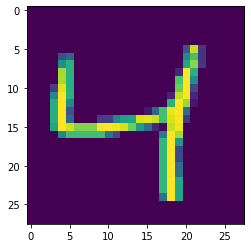

In [7]:
plt.imshow(training_images[2])

In [8]:
# Chuẩn hóa lại dữ liệu bằng cách chia các giá trị của pixel cho 255.0
# Sử dụng test_images, test_labels để làm tập validation

training_images = training_images / 255.0

# lớp convolution (ảnh xám)
training_images = training_images.reshape(60000, 28,28, 1) 

test_images = test_images / 255.0
test_images = test_images.reshape(10000, 28,28,1)

In [9]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten # duỗi ra
from tensorflow.keras.layers import Dense #thu nhỏ lại
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [10]:
#Mô hình lenet5

#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28,28,1), padding='same'))

# S2 Pooling Layer 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))

# S4 Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), activation='tanh'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(Dense(10, activation='softmax'))

model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# sparse_categorical_crossentropy làm việc với label là số
# adam dựa vào độ lớn của đạo hàm sẽ tự động find tooling learning range ==> train nhanh hơn hiệu quả hơn

# Tiến hành training

hist = model.fit(training_images, training_labels, epochs=10,batch_size=128, validation_data=(test_images, test_labels), verbose=1)
# model chỉ học thôi chứ không nhớ nên độ chính xác không bao giờ = 100% 

Epoch 1/10
469/469 [==============================] - 14s 28ms/step - loss: 0.2640 - accuracy: 0.9222 - val_loss: 0.0737 - val_accuracy: 0.9767
Epoch 2/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0722 - accuracy: 0.9776 - val_loss: 0.0500 - val_accuracy: 0.9832
Epoch 3/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0502 - accuracy: 0.9848 - val_loss: 0.0420 - val_accuracy: 0.9858
Epoch 4/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0396 - accuracy: 0.9874 - val_loss: 0.0345 - val_accuracy: 0.9887
Epoch 5/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0327 - val_accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0331 - val_accuracy: 0.9895
Epoch 7/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.0289 - val_accuracy:

In [12]:
test_score = model.evaluate(test_images, test_labels)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0323 - accuracy: 0.9903
Test loss 0.0323, accuracy 99.03%


In [13]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


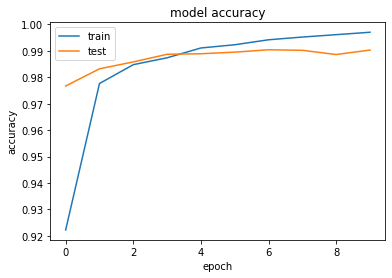

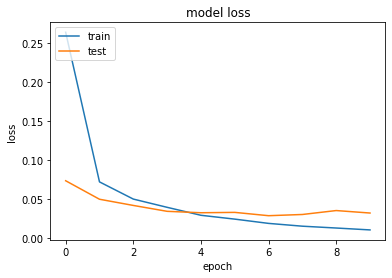

In [14]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[7 2 1 ... 4 5 6]


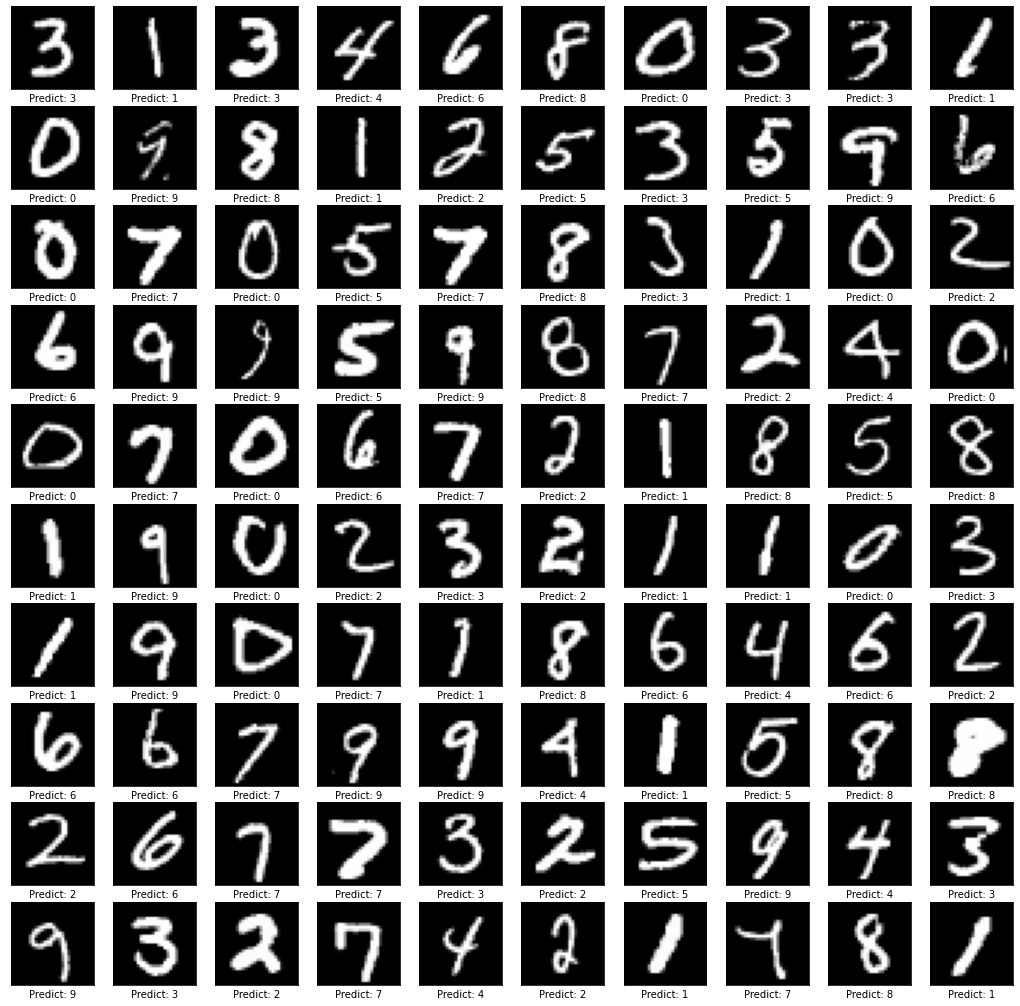

In [15]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import classification_report


# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Predict the labels of digit images in our test dataset.
predictions = model.predict(test_images)

# As the model output 10 float representing the probability of the input image
# being a digit from 0 to 9, we need to find the largest probability value
# to find out which digit the model predicts to be most likely in the image.
prediction_digits = np.argmax(predictions, axis=1)
print(prediction_digits)
# Then plot 100 random test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.

plt.figure(figsize=(18, 18))

for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_index = random.randint(0, len(prediction_digits))
    img_path = test_images[image_index]  
    if(len(img_path.shape) == 3):
        plt.imshow(np.squeeze(img_path), cmap=plt.cm.gray)
    elif(len(img_path.shape) == 2):
        plt.imshow(img_path)
    else:
        print("Higher dimensional data")
    ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           test_labels[image_index]))
    plt.xlabel('Predict: %d' % prediction_digits[image_index])
plt.show()

In [16]:
model.save("model-lenet5")

INFO:tensorflow:Assets written to: model-lenet5\assets


In [17]:
# Convert Keras model to TF Lite format.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model as file
f = open('lenet5.tflite', "wb")
f.write(tflite_model)
f.close()

INFO:tensorflow:Assets written to: C:\Users\HoangNam\AppData\Local\Temp\tmppc5bx97r\assets
